In [1]:
import numpy as np
from ppu.generator import Circular, GaussianBlobs, Moons, RingBlobs
from ppu.methods.mlp import MLP
from ppu.methods.utils import get_dataset, get_models
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from threadpoolctl import threadpool_limits


In [2]:
names = [
    "5 Nearest Neighbors",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "XGBoost",
    "Naive Bayes",
    "Neural Net"
]

classifiers = [
    KNeighborsClassifier(5),
    SVC(gamma=2, C=1, probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=10),
    GradientBoostingClassifier(n_estimators=10),
    GaussianNB(),
    MLP(hidden_channels=[30, 100, 50, 1], patience=30, frequency=3)
]

n_ticks = 100
n_samples = 500  #train instances
reps = 64 # train set sample


generator = {
    "GaussianBlobs" : GaussianBlobs,
    "Circular" : Circular,
    "Moons" : Moons,
    "RingBlobs" : RingBlobs
}

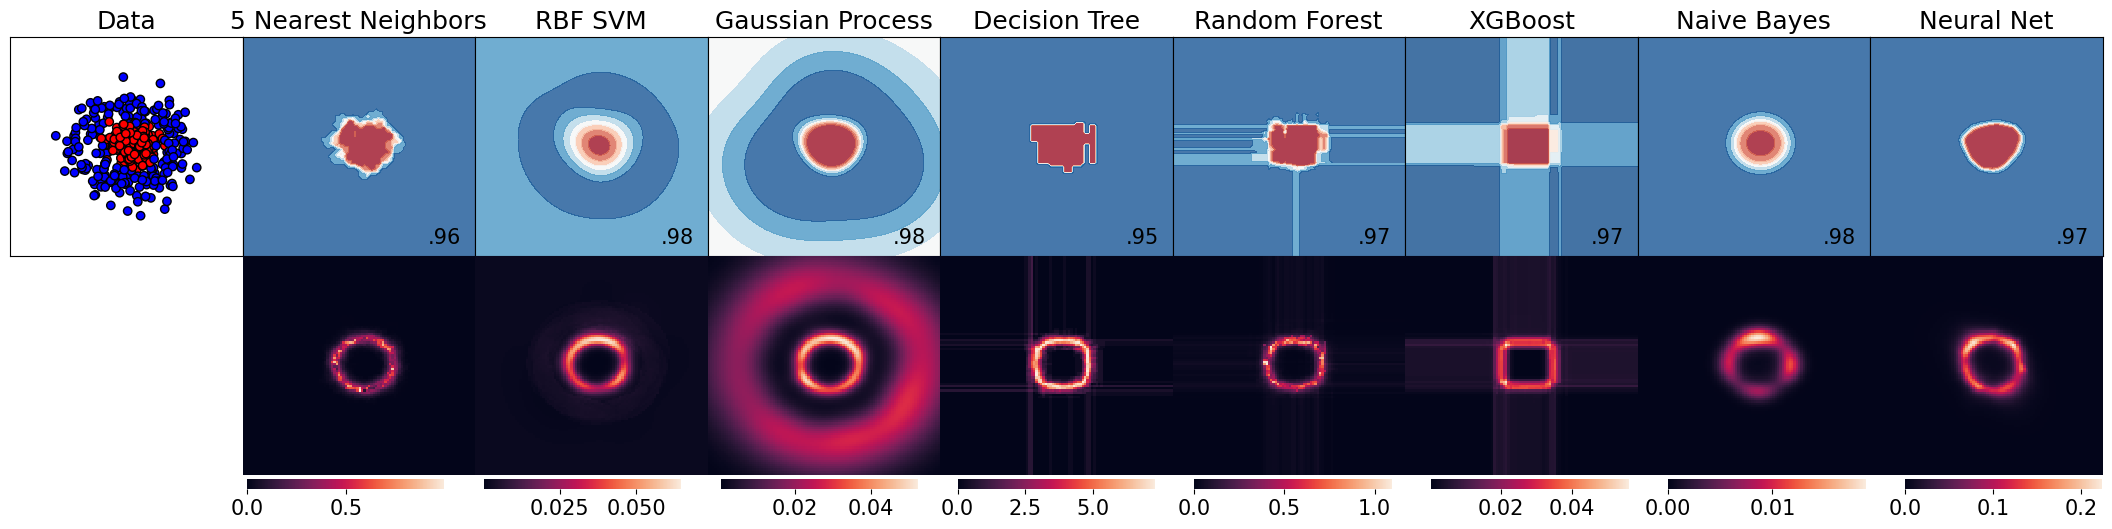

In [3]:
from ppu.viz.bregman_plot import draw_classifier

gen_name = "Circular"
gen = generator[gen_name]
with threadpool_limits(limits=1):
    models = {name: get_models(func, gen, reps=reps, n_samples=n_samples) for name, func in zip(names, classifiers)}

figure = draw_classifier(gen, n_samples, names, classifiers, models, rescale = False)

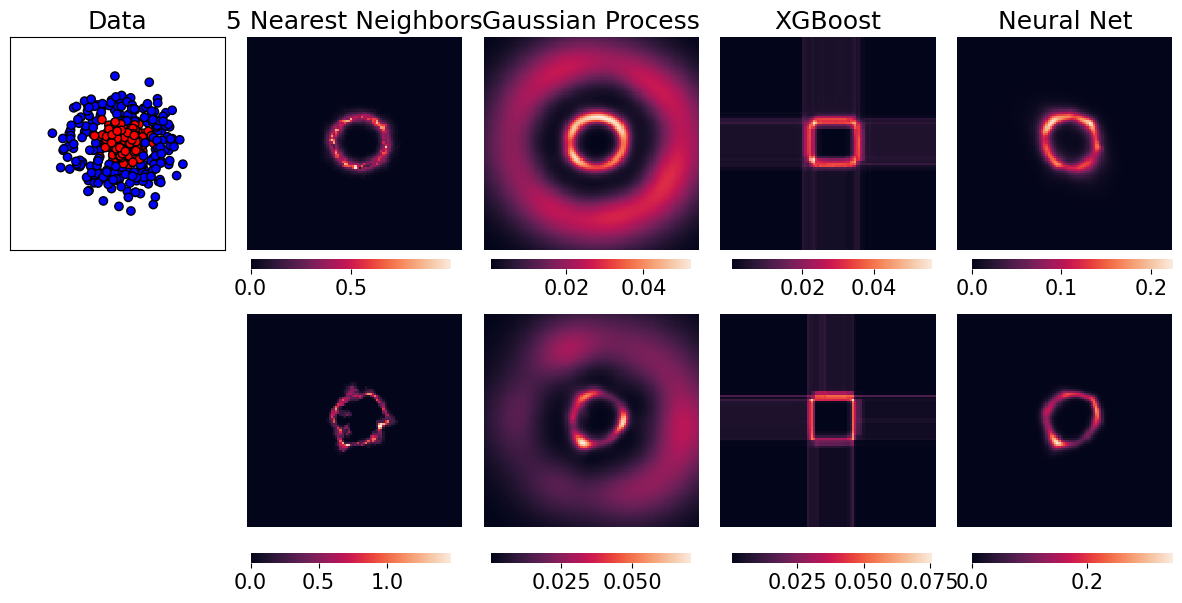

In [4]:
from ppu.viz.bregman_plot import draw_classifiers_BIbs

model_selected = [
    "5 Nearest Neighbors",
    "Gaussian Process",
    "XGBoost",
    "Neural Net"
]
selected_models = {k: models[k] for k in model_selected if k in models}
selected_clfs = {k: dict(zip(names, classifiers))[k] for k in model_selected if k in models}
name_gen = "Circular"
gen = generator[name_gen]

figure = draw_classifiers_BIbs(gen, 500, selected_clfs, selected_models, 75)

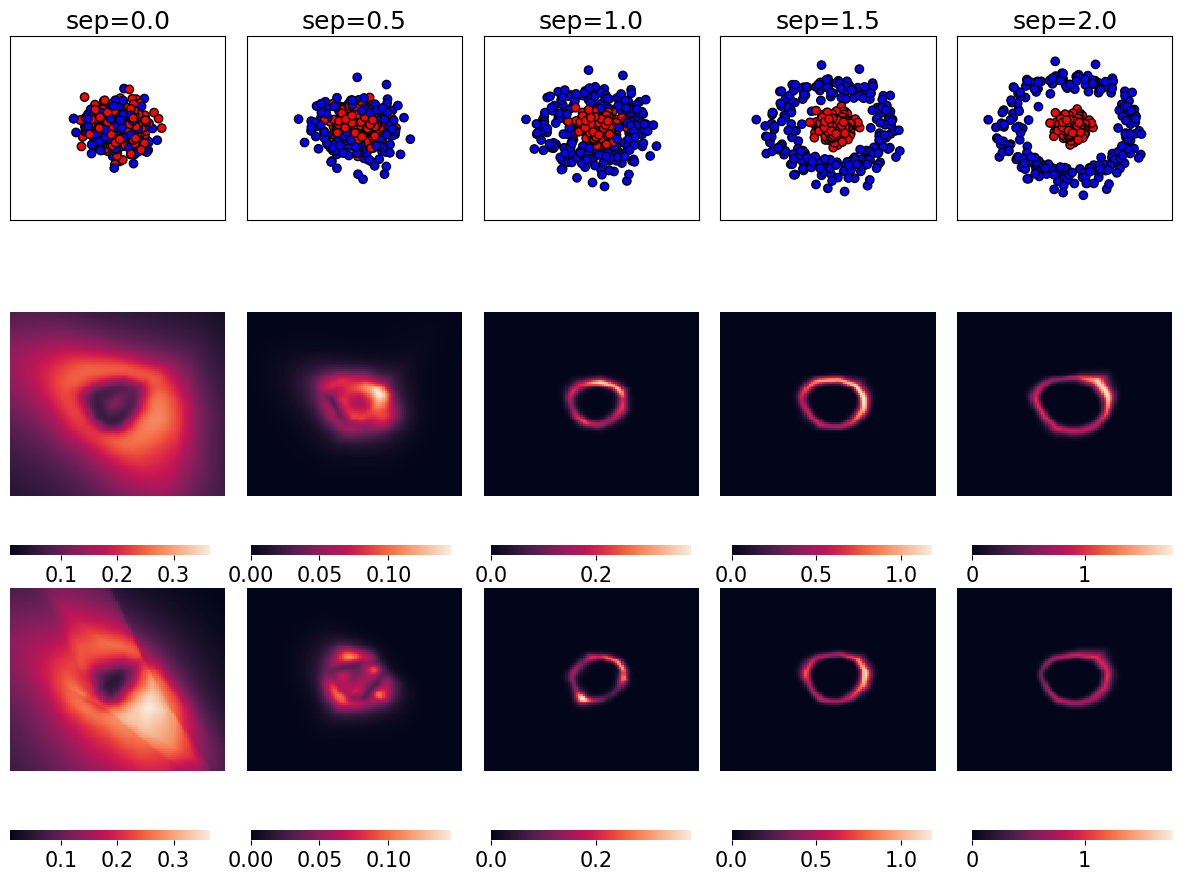

In [5]:
from ppu.viz.bregman_plot import draw_diff_class_sep

name_gen = "Circular"
gen = generator[name_gen]

cl_name = "Neural Net"
classifier = dict(zip(names, classifiers))[cl_name]

seps = [0.5 * i for i in range(5)]

figure = draw_diff_class_sep(classifier, gen, n_samples=500, seps=seps)

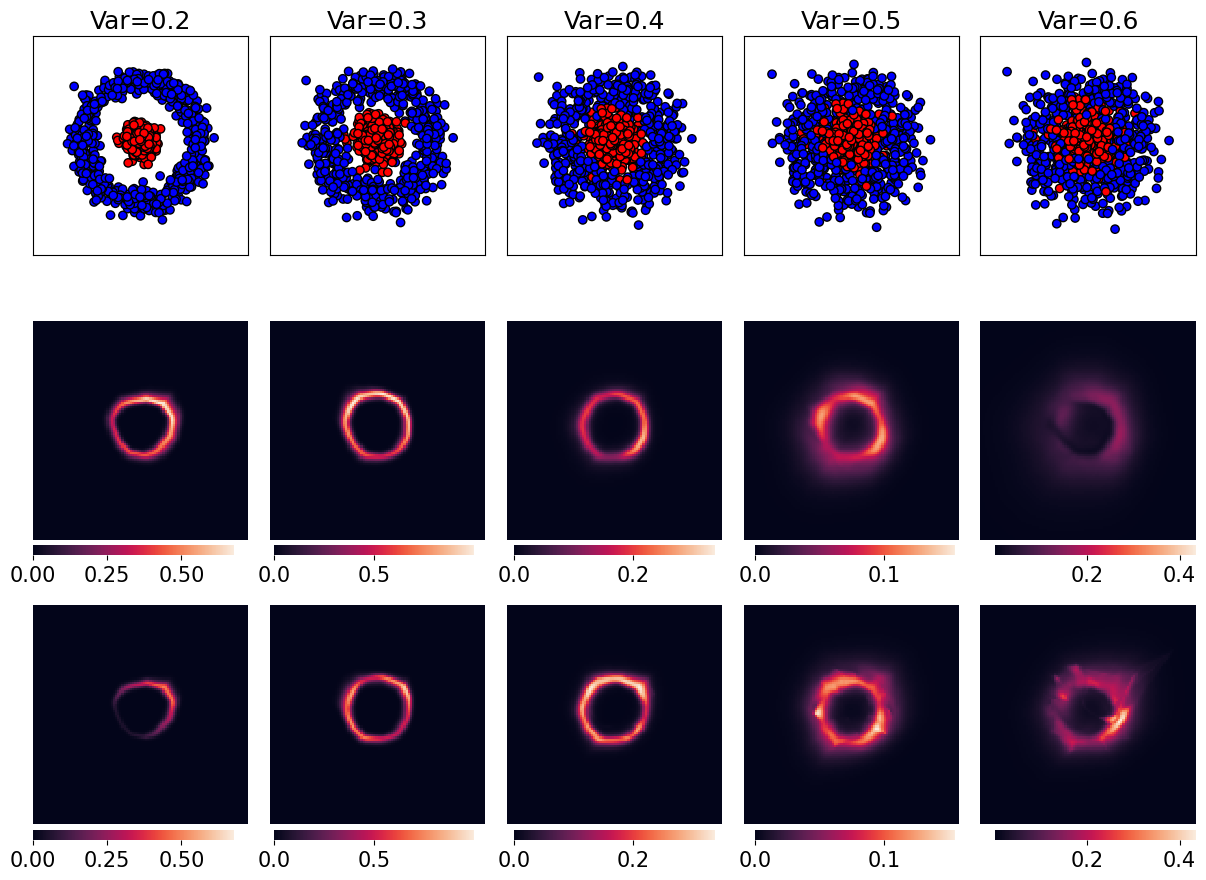

In [6]:
from ppu.viz.bregman_plot import draw_diff_variances

name_gen = "Circular"
gen = generator[name_gen]

cl_name = "Neural Net"
classifier = dict(zip(names, classifiers))[cl_name]

v = [0.2, 0.3, 0.4, 0.5, 0.6]

figure = draw_diff_variances(classifier, gen, n_samples=1000, variances=v)

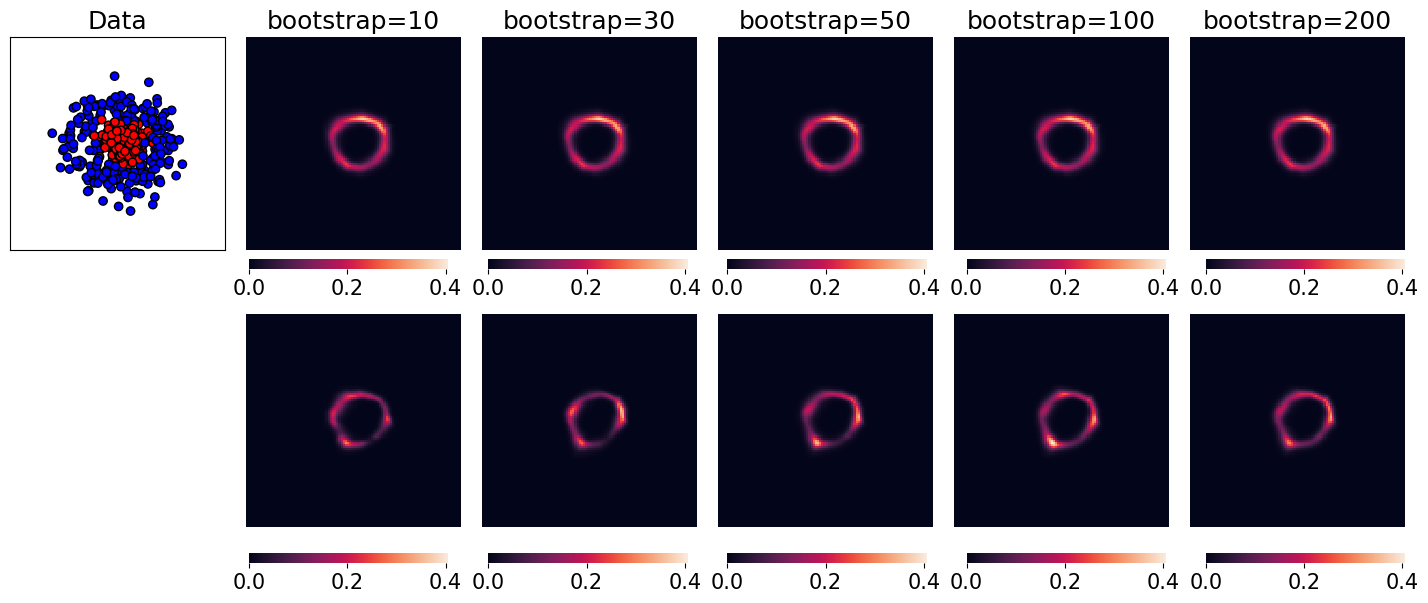

In [7]:
from ppu.viz.bregman_plot import draw_diff_bootstrap

name_gen = "Circular"
gen = generator[name_gen]

cl_name = "Neural Net"
classifier = dict(zip(names, classifiers))[cl_name]

bootstrap = [10, 30, 50, 100, 200]

figure = draw_diff_bootstrap(classifier, gen, n_samples=500, bootstrap=bootstrap)

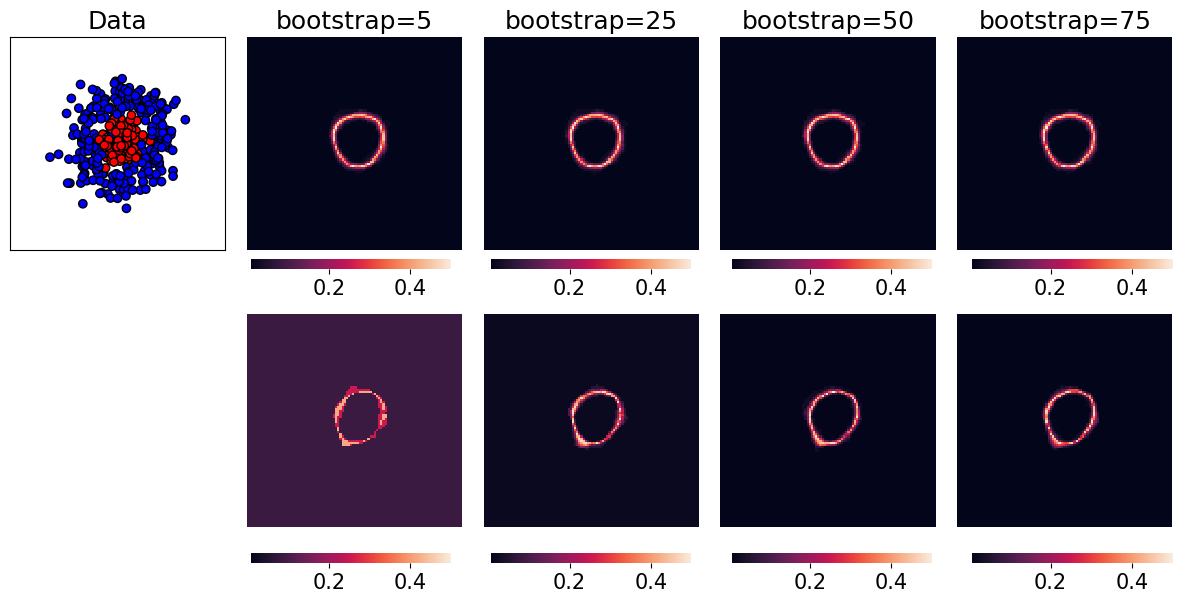

In [8]:
from ppu.viz.beta_plot import draw_beta_bs

name_gen = "Circular"
gen = generator[name_gen]

cl_name = "Neural Net"
classifier = dict(zip(names, classifiers))[cl_name]

figure = draw_beta_bs(classifier, gen, n_samples=500, bootstrap=[5, 25, 50, 75])

In [9]:
from ppu.viz.beta_plot import draw_beta_pdf

name_gen = "Circular"
gen = generator[name_gen]

cl_name = "Neural Net"
classifier = dict(zip(names, classifiers))[cl_name]


dataset = get_dataset(0, gen, n_samples=n_samples)
ds = dataset
(X_train, y_train), (X_test, y_test) = ds # X is the data point, y is the class label

eps = 1
x_min, x_max = X_train[:, 0].min() - eps, X_train[:, 0].max() + eps
y_min, y_max = X_train[:, 1].min() - eps, X_train[:, 1].max() + eps

start = np.array([(x_max+x_min)/2, (y_max+y_min)/2])
end = np.array([x_max,y_max])

draw_beta_pdf(start, end, classifier, gen, n_samples=200, n_pdf=75)